<a href="https://colab.research.google.com/github/maryline321/datascience/blob/main/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is used to build various classification models to predict whether a particular red wine is a good quality or not. Each wine is given a quality score between 0 and 10.



In [10]:
from google.colab import files
uploaded=files.upload()

Saving winequality.csv to winequality (1).csv


**Importing the libraries.**

In [11]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Reading the data**

In [12]:
wine=pd.read_csv(io.BytesIO(uploaded['winequality.csv']))
print(wine)

       type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0     white            7.0             0.270  ...       0.45      8.8        6
1     white            6.3             0.300  ...       0.49      9.5        6
2     white            8.1             0.280  ...       0.44     10.1        6
3     white            7.2             0.230  ...       0.40      9.9        6
4     white            7.2             0.230  ...       0.40      9.9        6
...     ...            ...               ...  ...        ...      ...      ...
6492    red            6.2             0.600  ...       0.58     10.5        5
6493    red            5.9             0.550  ...        NaN     11.2        6
6494    red            6.3             0.510  ...       0.75     11.0        6
6495    red            5.9             0.645  ...       0.71     10.2        5
6496    red            6.0             0.310  ...       0.66     11.0        6

[6497 rows x 13 columns]


In [13]:
#statistical information to check for the missing values
#the null values can be filled using the mean median of mode for numeric 

wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [14]:
wine.info()

#one feature is an object and the last value is integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


**Check for missing values**

In [15]:
#pre processing stage
#check for the null values
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [16]:
#fill the missing values
#we ignore type column because it is a string.
for col, value in wine.items():
  if col!='type':
    wine[col]=wine[col].fillna(wine[col].mean())

In [17]:
wine.isnull().sum()


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

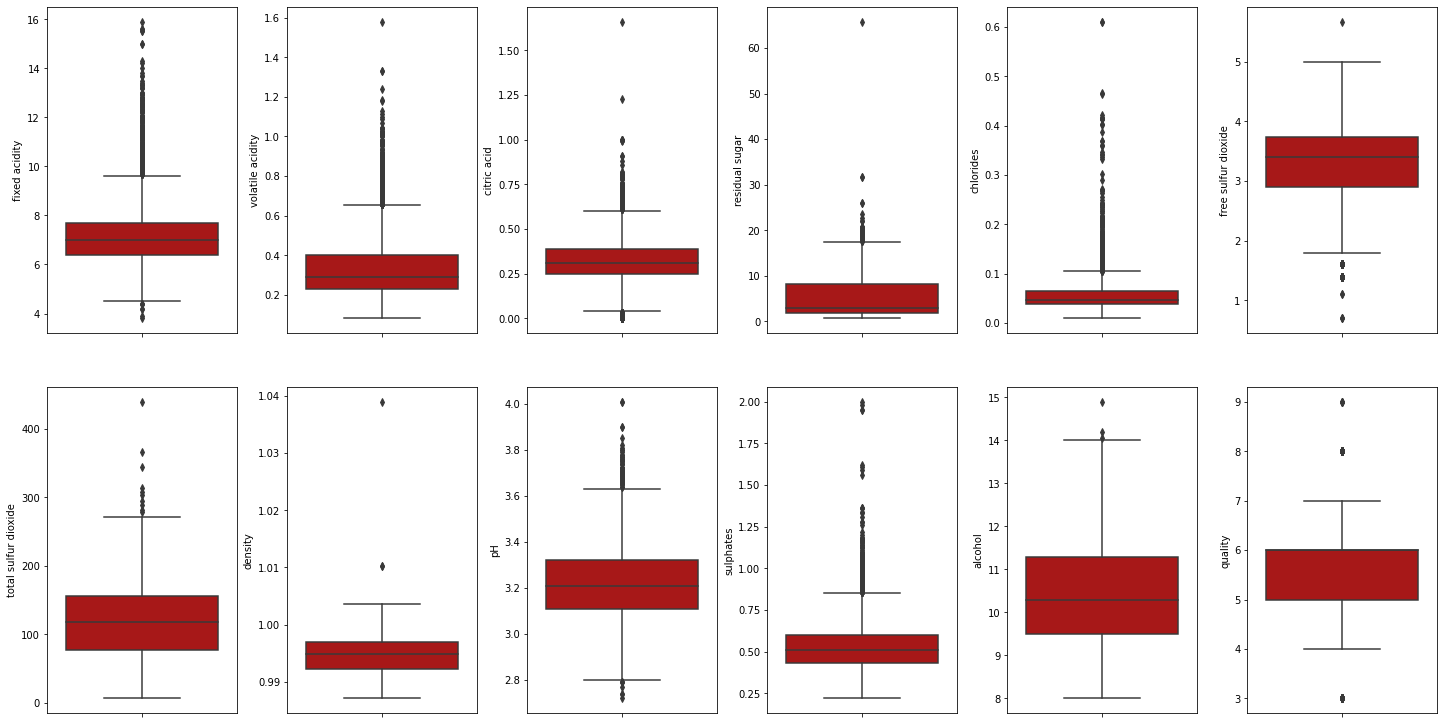

In [138]:
#Explanatory data analysis.
# create a box plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in wine.items():
  if col !='type':
    sns.boxplot(y=col, data=wine, ax=ax[index], palette='gist_heat_r')
    index +=1 
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

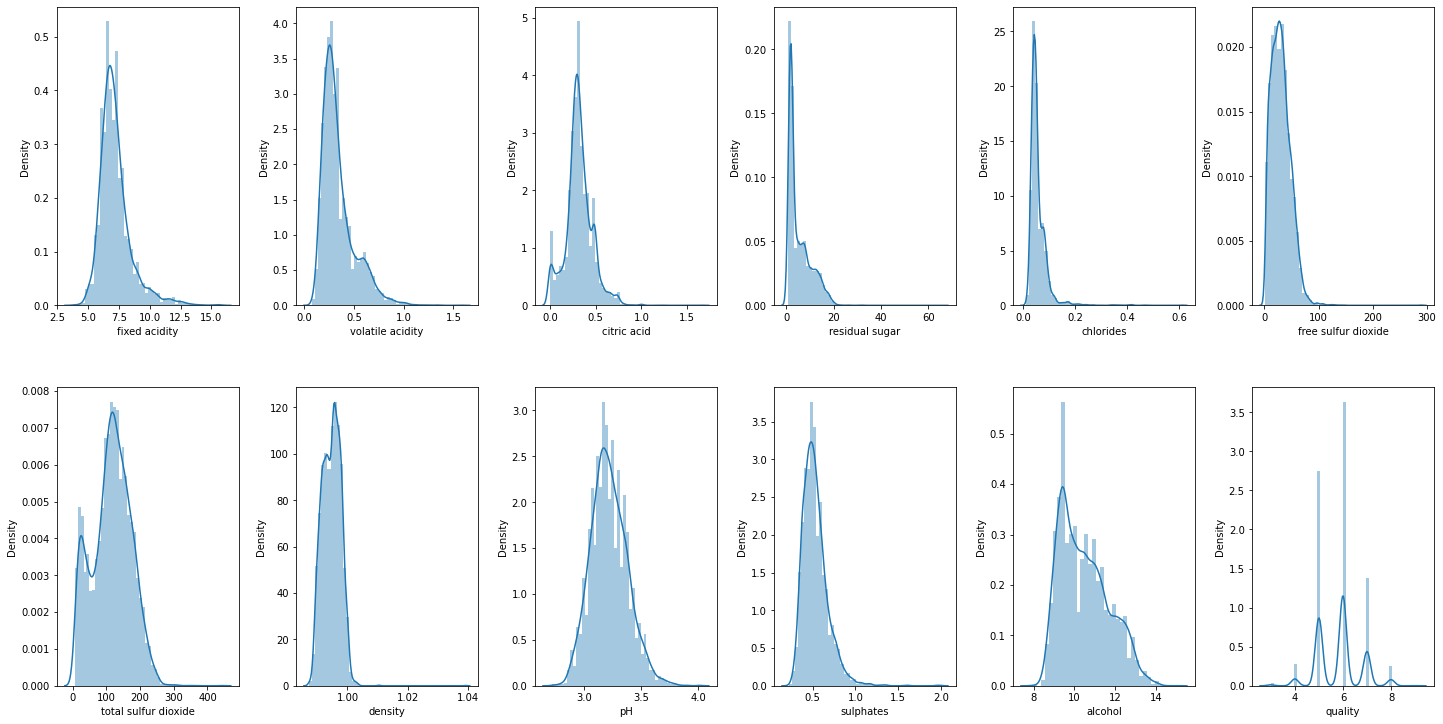

In [19]:
#Explanatory data analysis.
# create a box plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in wine.items():
  if col !='type':
    sns.distplot(value, ax=ax[index])
    index +=1 
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [21]:
wine['free sulfur dioxide']=np.log(1+wine['free sulfur dioxide'])

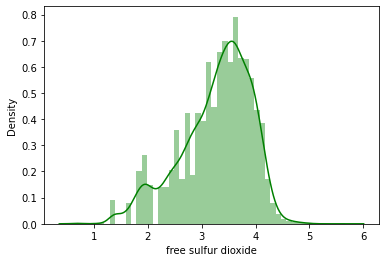

In [145]:
sns.distplot(wine['free sulfur dioxide'], color="green")

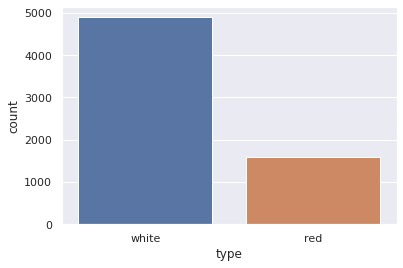

In [152]:
#how many dataset goes for the red and white wine

sns.countplot(wine['type'])

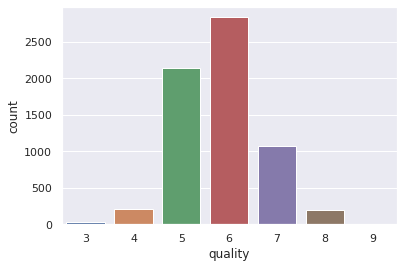

In [158]:
sns.countplot(wine['quality'], data=titanic)

#class imbalancement

**`Correlation matrix`**

This allows to get a much better understsnding of the relationships between variables.

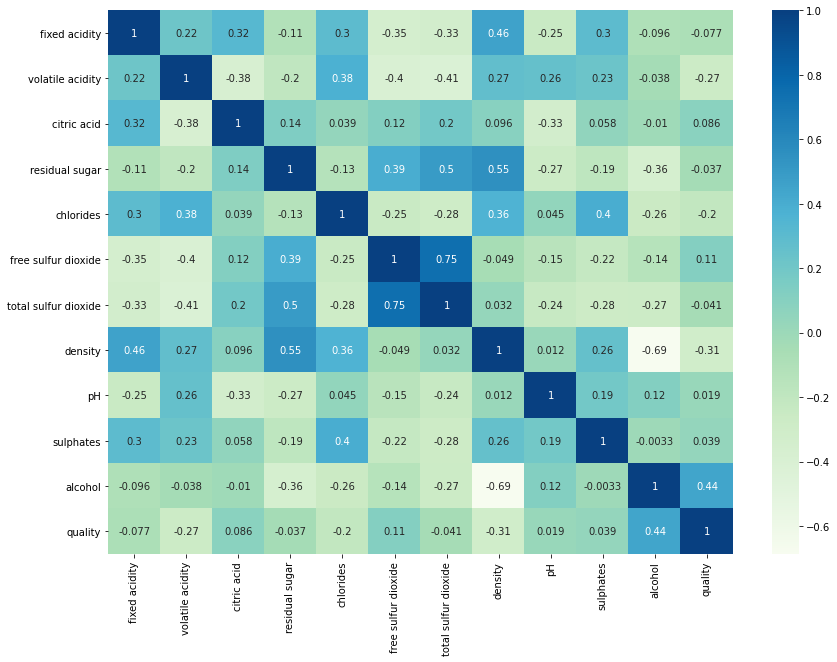

In [133]:
#correlation matrix
corr=wine.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True,cmap='GnBu')

In [83]:
# input insplit 
x = wine.drop(columns=['type', 'quality'])
y = wine['quality']

In [101]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [109]:
#Convert data into an array

array = wine.values

# Now split data into features - X , label - Y

X  = array[:, 0:12]   # 12 is the class. Its not counted here, there is a -1

Y =  array[:, 12]   # 12 is counted here, target.



In [163]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X_new, Y_new = oversample.fit_resample(x, y)

In [164]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test  = model_selection.train_test_split(X_new, Y_new, 
                                                                test_size = 0.3, 
                                                                random_state = 42)


In [161]:
#: Modeling : Training

# Load models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC


# Cross validation of models to find out which could perform better

models = []
models.append(('DTree', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LogisticReg', LogisticRegression(solver='liblinear', 
                                                 multi_class='ovr')))
#models.append(('Random Forest', RandomForestClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Linear Disc', LinearDiscriminantAnalysis()))
#models.append(('Support Machines', SVC(gamma = 'auto')))



from sklearn.model_selection import cross_val_score, KFold
for name, model in models:
  kfold = KFold(n_splits = 10, random_state=42, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, 
                               scoring='accuracy')
  # add above cv_results, the loop will run for each model
  print('Model Name ', name, 'Results', cv_results.mean())
  


Model Name  DTree Results 0.7859113486748398
Model Name  Gaussian Results 0.4475375380041539
Model Name  KNN Results 0.7646100657271158
Model Name  LogisticReg Results 0.47049220235043065
Model Name  Gradient Boosting Results 0.7375509527583117
Model Name  Linear Disc Results 0.49337730679387376


In [165]:
# we pick DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [172]:
# as trained the model to predict 30% test data
predictions = model.predict(X_test)

# check accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(Y_test, predictions))

from sklearn.metrics import classification_report
print('Report: ', classification_report(Y_test, predictions))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, predictions))


newwine = [[6.5, 	0.44, 	0.47, 9.1,0.031, 46, 151	,	0.9926,	3.16	,0.37,13.7]]
newwine = model.predict(newwine)

print('What is the possibility of the Wine Quality Range?', newwine)

# Confusion MAtrix are read diagnally



Accuracy:  0.7907991940899933
Report:                precision    recall  f1-score   support

           3       0.95      0.96      0.96       881
           4       0.82      0.84      0.83       828
           5       0.65      0.60      0.62       849
           6       0.57      0.57      0.57       872
           7       0.70      0.69      0.70       854
           8       0.85      0.88      0.87       874
           9       1.00      1.00      1.00       798

    accuracy                           0.79      5956
   macro avg       0.79      0.79      0.79      5956
weighted avg       0.79      0.79      0.79      5956

[[850   8  13   7   1   2   0]
 [ 14 696  63  35  18   2   0]
 [ 16  85 507 177  48  16   0]
 [ 14  41 145 494 136  42   0]
 [  1  15  42 125 593  77   1]
 [  0   5  15  30  51 773   0]
 [  0   0   0   1   0   0 797]]
What is the possibility of the Wine Quality Range? [8]
